## Eksik Değerleri Bulma
Tahmini süre: 30 dakika

Veri düzenleme, verileri analiz için uygun hale getirmek amacıyla temizleme, dönüştürme ve organize etme işlemidir. Eksik değerleri bulmak ve ele almak, veri doğruluğunu ve eksiksizliğini sağlamak için bu sürecin çok önemli bir adımıdır. Bu laboratuvar çalışmasında, veri kümesindeki eksik değerleri belirlemeye ve ele almaya odaklanacaksınız.

Hedefler
Bu laboratuvar çalışmasını tamamladıktan sonra şunları yapabileceksiniz:

Veri kümesindeki eksik değerleri belirlemek.

Belirli sütunlar için eksik değerleri nicelleştirmek.

Çeşitli stratejiler kullanarak eksik değerleri doldurmak.

Uygulamalı Laboratuvar Çalışması
Kurulum: Gerekli Kütüphaneleri Kurun

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 134.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 164.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 136.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 157.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 171.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Görevler
# 1. Veri Setini Yükleme
CSV dosyalarını okumak için pandas.read_csv() fonksiyonunu kullanıyoruz. Ancak, JupyterLite üzerinde çalışan bu laboratuvar sürümünde, veri setinin aşağıdaki kod kullanılarak arayüze indirilmesi gerekiyor.

Aşağıdaki fonksiyonlar veri setini tarayıcınıza indirecektir:

In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

## 2. Veri Kümesini Keşfetme
Görev 1: Veri kümesinin temel bilgilerini ve özet istatistiklerini görüntüleyin.

In [4]:
# 1. Veri kümesinin genel yapısını ve sütun türlerini inceleyelim
print("### Veri Kümesi Temel Bilgileri ###")
print(df.info())

# 2. Veri kümesinin satır ve sütun sayısını görelim
print(f"\nVeri seti {df.shape[0]} satır ve {df.shape[1]} sütundan oluşmaktadır.")

# 3. Sayısal sütunlar için özet istatistikleri (Ortalama, Standart Sapma, Min, Max vb.) görüntüleyelim
print("\n### Sayısal Sütunlar Özet İstatistikleri ###")
display(df.describe())

# 4. Kategorik (Metin tabanlı) sütunların özetini görelim
print("\n### Kategorik Sütunlar Özeti ###")
display(df.describe(include=['object'])) 

### Veri Kümesi Temel Bilgileri ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Veri seti 65437 satır ve 114 sütundan oluşmaktadır.

### Sayısal Sütunlar Özet İstatistikleri ###


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000



### Kategorik Sütunlar Özeti ###


,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase
count,65437,65437,65437,54806,65437,54466,60784,60488,49237,40897,...,27710,28911,28844,28251,27764,28491,28807,28858,56182,56238
unique,5,8,110,3,1,118,8,418,10853,113,...,5,5,5,954,514,3,9,15,3,3
top,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,Appropriate in length,Easy
freq,50207,23911,39041,23015,65437,9993,24942,3674,603,6947,...,14426,10951,9341,2364,2834,13230,15813,11918,38767,30071



## 3. Eksik Değerleri Bulma
Görev 2: Tüm sütunlardaki eksik değerleri belirleyin.

In [5]:
# 1. Her bir sütun için eksik (null) değerlerin toplam sayısını hesaplayalım
missing_data = df.isnull().sum()

# 2. Sonuçları bir DataFrame içine alarak daha okunabilir hale getirelim
missing_df = missing_data.to_frame(name='Eksik değer sayısı')

# 3. Sadece eksik değer içeren sütunları, en çok eksikten en aza doğru sıralayalım
missing_only = missing_df[missing_df['Eksik değer sayısı'] > 0].sort_values(by='Eksik değer sayısı', ascending=False)

# 4. Sonuçları görüntüleyelim (Hepsini görmek için listeyi yazdırıyoruz)
print('### Sütun Bazında Eksik Değer Sayıları (Sıralı) ###')
print(missing_only)

# 5. Toplam veri seti bazında bir özet bilgi verelim
total_cells = df.size
total_missing = missing_data.sum()
print(f"\nVeri setindeki toplam hücre sayısı: {total_cells}")
print(f"Veri setindeki toplam eksik değer sayısı: {total_missing}")
print(f"Eksik verilerin genel oranı: %{round((total_missing / total_cells) * 100, 2)}")


### Sütun Bazında Eksik Değer Sayıları (Sıralı) ###
                            Eksik değer sayısı
AINextMuch less integrated               64289
AINextLess integrated                    63082
AINextNo change                          52939
AINextMuch more integrated               51999
EmbeddedAdmired                          48704
...                                        ...
YearsCode                                 5568
NEWSOSites                                5151
LearnCode                                 4949
EdLevel                                   4653
AISelect                                  4530

[109 rows x 1 columns]

Veri setindeki toplam hücre sayısı: 7459818
Veri setindeki toplam eksik değer sayısı: 2890957
Eksik verilerin genel oranı: %38.75


In [6]:
## Görev 3: Isı haritası kullanarak eksik değerleri görselleştirin (seaborn kütüphanesini kullanarak).

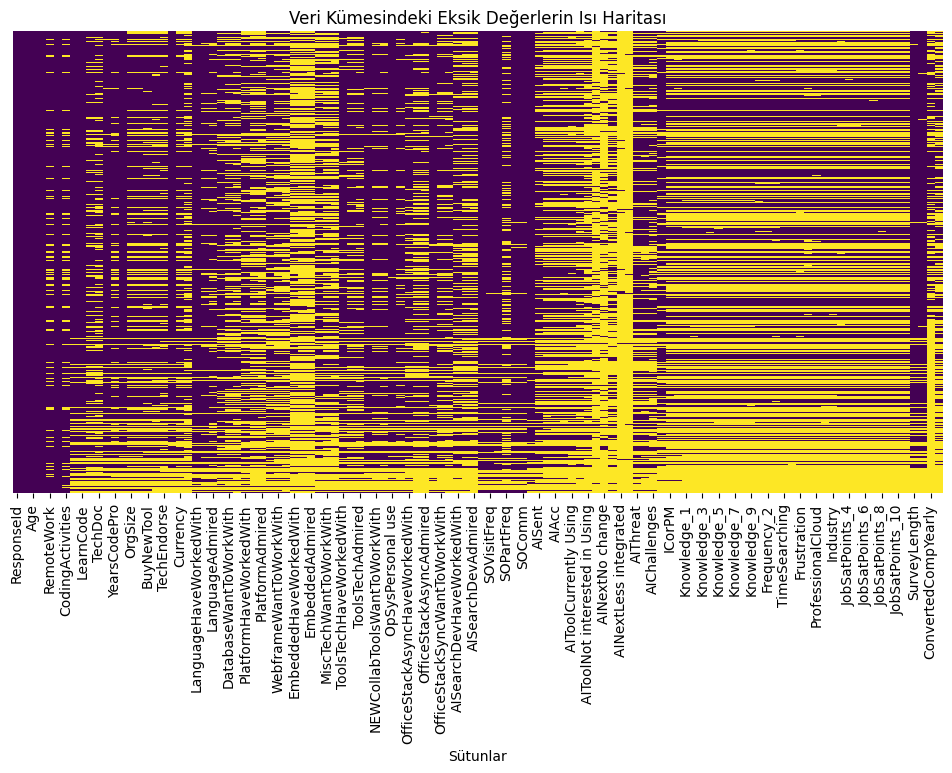

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Isı haritası oluşturma
plt.figure(figsize=(12, 6))
# isnull() ile True/False matrisi oluşturup cbar=False ile renk çubuğunu gizliyoruz
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.title('Veri Kümesindeki Eksik Değerlerin Isı Haritası')
plt.xlabel('Sütunlar')
plt.show()

#dolular mor bos olanlar sarı

"""yticklabels=False: Sol taraftaki 65 bin tane satır numarasını yazmaya çalışıp grafiği iyice bozmasın diye satır isimlerini gizler.
cbar=False: Yan taraftaki renk skalasını kaldırarak grafiğe daha fazla alan açar.

not:  "Mor olan sütunları (ResponseId, Age, EdLevel vb.) analizlerimde ana odak yapacağım; sarı olanları (AI soruları gibi) ise ya sileceğim ya da çok dikkatli kullanacağım."
"""

In [8]:
## Görev 4: Belirli bir sütun (örneğin, İstihdam) için eksik satır sayısını sayın.

In [9]:
# Employment sütunundaki eksik (null) değerleri sayalım
employment_missing = df['Employment'].isnull().sum()

print(f"'Employment' sütunundaki toplam eksik satır sayısı: {employment_missing}")

# Eğer bu eksiğin tüm veri setine oranını görmek istersen:
employment_ratio = (employment_missing / len(df)) * 100
print(f"Employment sütunundaki eksiklik oranı: %{employment_ratio:.2f}")

'Employment' sütunundaki toplam eksik satır sayısı: 0
Employment sütunundaki eksiklik oranı: %0.00


## 4. Eksik Değerlerin Doldurulması
Görev 5: Belirli bir sütunda (örneğin, İstihdam) en sık görülen (çoğunluk) değeri belirleyin.

In [12]:
employment_mode = df['Employment'].mode()[0]
print(f"'Employment' sütunundaki en yaygın çalışma şekli: {employment_mode}")


'Employment' sütunundaki en yaygın çalışma şekli: Employed, full-time


Görev 6: İstihdam sütunundaki eksik değerleri en sık görülen değerle doldurun.

In [13]:
# Boş değerleri mod değeri ile dolduralım
df['Employment'].fillna(employment_mode, inplace=True)

# İşlemin başarıyla tamamlandığını (0 eksik kaldığını) doğrulayalım
print(f"Doldurma sonrası 'Employment' eksik değer sayısı: {df['Employment'].isnull().sum()}")

Doldurma sonrası 'Employment' eksik değer sayısı: 0


/tmp/ipykernel_327/2876599232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(employment_mode, inplace=True)


In [17]:
# İşlem yapacağımız sütun: EdLevel (Eğitim Seviyesi)
target_col = 'EdLevel'

# 1. Adım: Bu sütundaki en popüler (çoğunluk) cevabı bulalım (Mod)
ed_mode = df[target_col].mode()[0]
print(f"'{target_col}' için belirlenen en sık değer: {ed_mode}")

# 2. Adım: Bu sütundaki tüm NaN (boş) hücreleri bu değerle dolduralım
df[target_col].fillna(ed_mode, inplace=True)

# 3. Adım: Başarıyı test edelim
remaining_nan = df[target_col].isnull().sum()
print(f"Doldurma sonrası '{target_col}' sütununda kalan boşluk sayısı: {remaining_nan}")

'EdLevel' için belirlenen en sık değer: Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Doldurma sonrası 'EdLevel' sütununda kalan boşluk sayısı: 0


/tmp/ipykernel_327/704406575.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[target_col].fillna(ed_mode, inplace=True)


## 5. Eksik Verilerin Görselleştirilmesi
Görev 7: Eksik verilerin tamamlanmasından sonra bir sütunun dağılımını görselleştirin (örneğin, İstihdam).

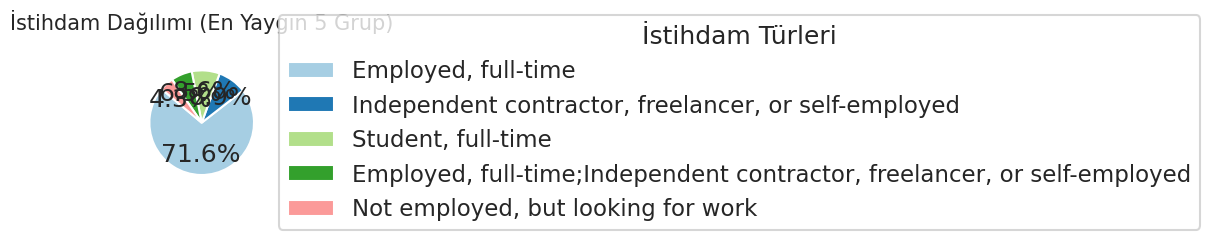

In [21]:
import matplotlib.pyplot as plt

# 1. Veriyi hazırla (İlk 5 kategoriyi alalım ki grafik kalabalık olmasın, diğerlerini 'Diğer' yapalım)
data = df['Employment'].value_counts()
top_data = data.head(5) # En çok tekrar eden 5 istihdam türü

# 2. Grafik alanını oluştur
plt.figure(figsize=(10, 7))

# 3. Pasta grafiğini çiz (Yazıları grafiğin dışına, göstergeye taşıyacağız)
plt.pie(top_data, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# 4. Yandaki göstergeyi (Legend) ekle - İşte bu, o uzun yazı sorununu çözer!
plt.legend(labels=top_data.index, title="İstihdam Türleri", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('İstihdam Dağılımı (En Yaygın 5 Grup)', fontsize=15, pad=20)
plt.tight_layout()
plt.show()